# AIN429 - ASSIGNMENT 

## Library Imports

The required libraries are downloaded in the cell below. <br>
I decided to use matplotlib, seaborn and a new library for visualization called plotly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## Collecting The Data

I read csv file into pandas dataframe.

In [2]:
df = pd.read_csv('data.csv', sep=";")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

## Data Preprocessing 

In Data Preprocessing part, I made these operations respectively: <br>
- Print the length of data <br>
- Check the NaN values in data <br>
- Drop the NaN values in data <br>
- Check for duplicated rows (there were no duplicated rows) <br>
- Check for type of columns <br>
- Change all columns to "int64" <br>
- Dropping the outliers which are not in %5-%95 <br>

In [3]:
print("Length of Data:", len(df))

Length of Data: 846


In [4]:
round(df.describe())

compactness  circularity  distance_circularity  radius_ratio  \
count        846.0        841.0                 842.0         840.0   
mean          94.0         45.0                  82.0         169.0   
std            8.0          6.0                  16.0          34.0   
min           73.0         33.0                  40.0         104.0   
25%           87.0         40.0                  70.0         141.0   
50%           93.0         44.0                  80.0         167.0   
75%          100.0         49.0                  98.0         195.0   
max          119.0         59.0                 112.0         333.0   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count                 844.0                    846.0          845.0   
mean                   62.0                      9.0          169.0   
std                     8.0                      5.0           33.0   
min                    47.0                      2.0          112.0   
25%                    57.0                      7.0          147.0   
50%                    61.0                      8.0          157.0   
75%                    65.0                     10.0          198.0   
max                   138.0                     55.0          265.0   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count          845.0                   843.0                      846.0   
mean            41.0                    21.0                      148.0   
std              8.0                     3.0                       15.0   
min             26.0                    17.0                      118.0   
25%             33.0                    19.0                      137.0   
50%             43.0                    20.0                      146.0   
75%             46.0                    23.0                      159.0   
max             61.0                    29.0                      188.0   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count            843.0              844.0                      844.0   
mean             189.0              439.0                      175.0   
std               31.0              177.0                       33.0   
min              130.0              184.0                      109.0   
25%              167.0              318.0                      149.0   
50%              179.0              364.0                      174.0   
75%              217.0              587.0                      198.0   
max              320.0             1018.0                      268.0   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                        842.0           840.0             845.0   
mean                          72.0             6.0              13.0   
std                            7.0             5.0               9.0   
min                           59.0             0.0               0.0   
25%                           67.0             2.0               5.0   
50%                           72.0             6.0              11.0   
75%                           75.0             9.0              19.0   
max                          135.0            22.0              41.0   

       skewness_about.2  hollows_ratio  
count             845.0          846.0  
mean              189.0          196.0  
std                 6.0            7.0  
min               176.0          181.0  
25%               184.0          190.0  
50%               188.0          197.0  
75%               193.0          201.0  
max               206.0          211.0

In [5]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [6]:
df = df.dropna(how='any',axis=0) 

In [7]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio]
Index: []

In [8]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object

In [9]:
df = df.astype('int64')
df.dtypes

compactness                    int64
circularity                    int64
distance_circularity           int64
radius_ratio                   int64
pr.axis_aspect_ratio           int64
max.length_aspect_ratio        int64
scatter_ratio                  int64
elongatedness                  int64
pr.axis_rectangularity         int64
max.length_rectangularity      int64
scaled_variance                int64
scaled_variance.1              int64
scaled_radius_of_gyration      int64
scaled_radius_of_gyration.1    int64
skewness_about                 int64
skewness_about.1               int64
skewness_about.2               int64
hollows_ratio                  int64
dtype: object

In [10]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
df = df.reset_index(drop=True)
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           97           43                    73           173   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                    65                        6            153   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             42                      19                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176                379                        184   
1              170                330                        158   
2              223                635                        220   
3              160                309                        127   
4              176                361                        172   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70               6                16   
1                           72               9                14   
2                           73              14                 9   
3                           63               6                10   
4                           66              13                 1   

   skewness_about.2  hollows_ratio  
0               187            197  
1               189            199  
2               188            196  
3               199            207  
4               200            204

## Data Visualization

Graphs printed in cell below shows distribution of all columns respectively. Before removing outliers, they were more randomly distributed now they seems better. We can still see unwanted spots in only "max_length_aspect_ratio".

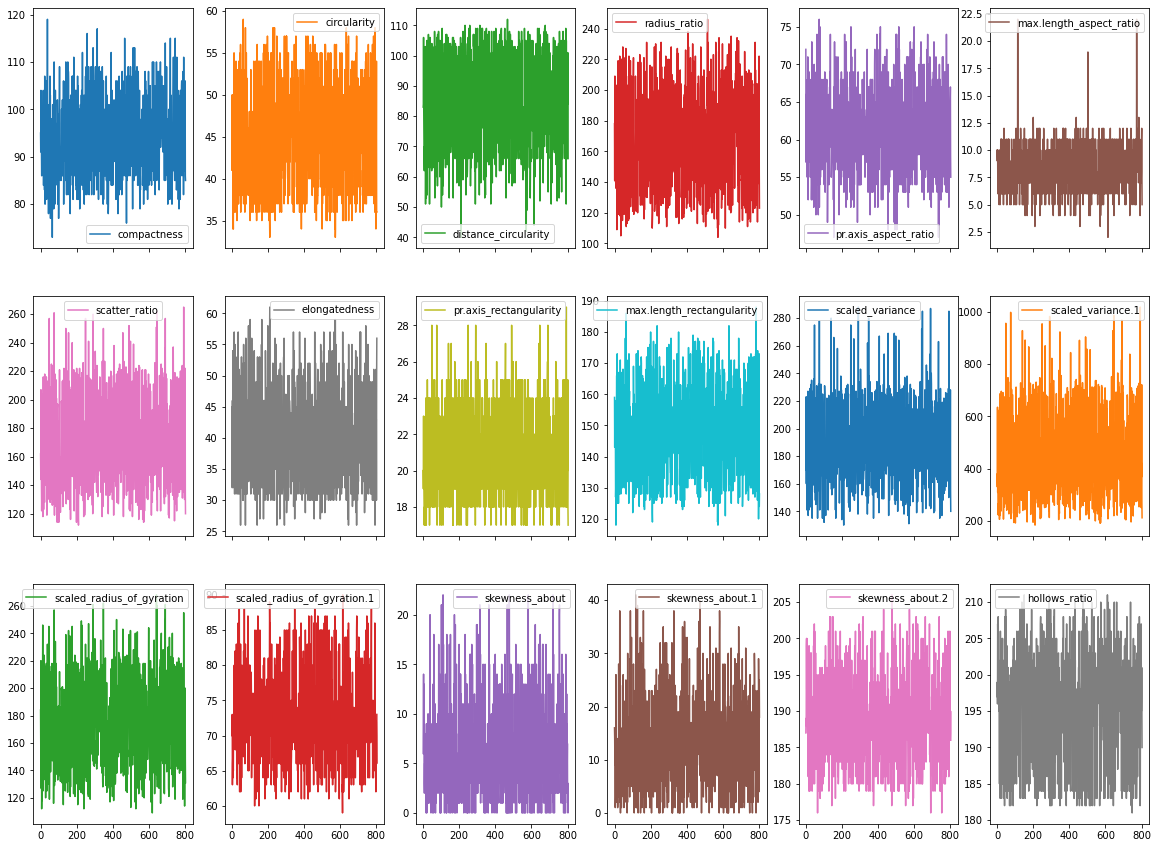

In [12]:
df.plot(subplots=True, layout=(3,6),figsize=(20,15))
plt.show()

In this graph we can see outliers and mean lines with boxplot graph of all columns

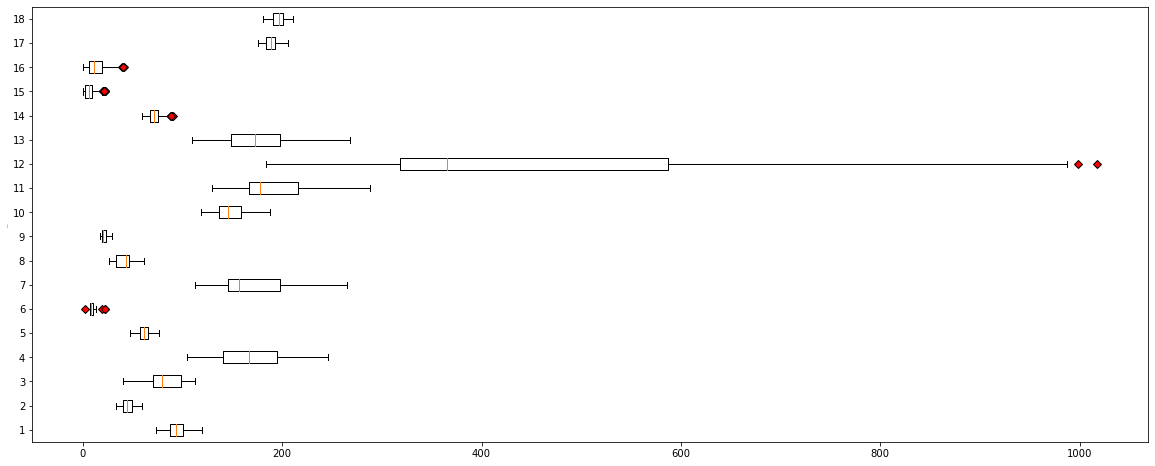

In [13]:
outlier_detection = dict(markerfacecolor='r', marker='D')
plt.subplots(figsize=(20, 8))
plt.boxplot(df,vert=False,flierprops=outlier_detection)
plt.ylabel("Features",Fontsize=0)
plt.show()

I wanted the show boxplot of just a column. I choosed "compactness" column and printed it with plotly library. You can see max,min,median,q1,q3 values with navigating your mouse in graph.

In [14]:
fig = px.box(df, y="compactness",notched=True,title="Boxplot Graph of Compactness",)
fig.show()

Here is just an example of scatter plot of two columns I choosed from dataframe. You can see "elongatedness" and "circularity" values of each point with navigating your mouse in graph.

In [15]:
fig = px.scatter(df, x='elongatedness', y='circularity', render_mode='webgl',title="Scatter Plot of Circularity and Elongatedness")
fig.update_traces(marker_line=dict(width=1, color='DarkSlateGray'))
fig.show()

I represented the Correlation Matrix of data with df.corr() function. In this graph we can see correlations between each columns. Yellow represents best correlation and while the correlation decreases, color darkens. 

Text(0.5, 1.0, 'Correlation Matrix')

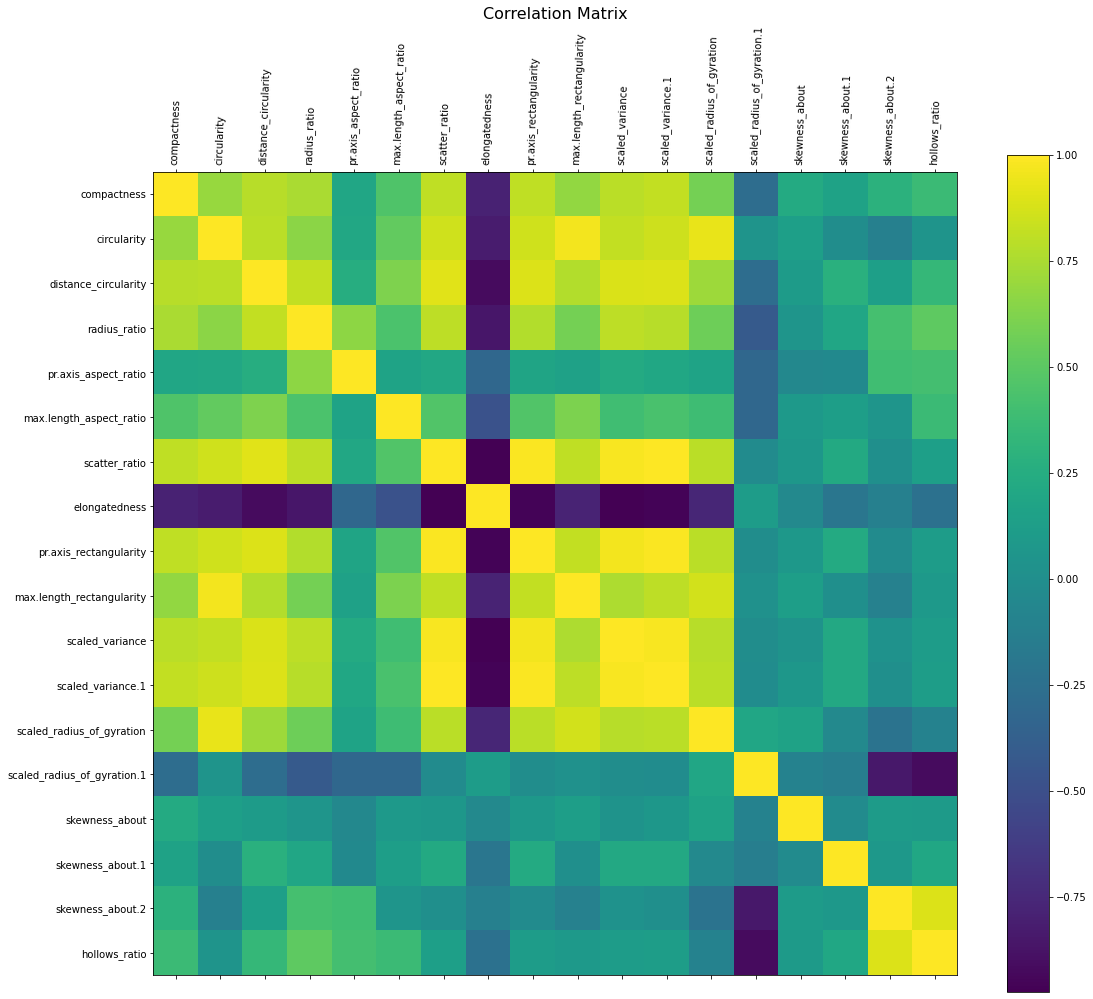

In [16]:
f = plt.figure(figsize=(18, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10,rotation=88)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)

Heatmap of 3 columns that I randomly choosed, just for presentation.

In [17]:
import plotly.express as px
fig = px.imshow(df[['compactness','circularity','scaled_variance']].corr(),text_auto=True,title="Heatmap of Compactness,Circularity and Scaled Variance")
fig.show()

## Clustering

Until this step data became ready for models and represented with graphs. Now, for clustering part I choosed 3 methods. These are: <br>
- KMeans Clustering
- Gaussian Mixture Clustering
- Agglomerative Clustering <br>

I created a dataframe named "clusters_df" for storing the result of clustering models. Predictions stored in here next steps. <br> <br>
In first step, I didn't normalize data and didn't select features. I stored results without this operations. After taking results of all models I normalized the data, selected features and ran them again.

In [18]:
clusters_df = pd.DataFrame()

### 1) KMeans 

I found best k value is 3 for KMeans (showed in graph) and I used 3 clusters in KMeans model. 

In [19]:
from sklearn.cluster import KMeans

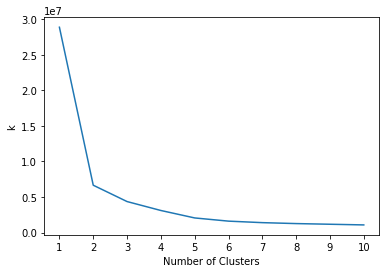

In [20]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state":34,
}

k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    k_list.append(kmeans.inertia_)

plt.plot(range(1, 11), k_list)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("k")
plt.show()

In [21]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=34)
kmeans.fit(df)

KMeans(init='random', n_clusters=3, random_state=34)

In [22]:
clusters_df['KMeans Clusters'] = kmeans.labels_

### 2) Gaussian Mixture

I applied Gaussian Mixture clustering with 3 clusters.

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
gm = GaussianMixture(n_components=3)
gm_preds = gm.fit_predict(df)

In [25]:
clusters_df['Gaussian Mixture Clusters'] = gm_preds

### 3) Agglomerative Clustering

I applied Agglomerative Clustering with 3 clusters.

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
ac = AgglomerativeClustering(n_clusters=3)
ac_preds = ac.fit_predict(df)

In [28]:
clusters_df['Agglomerative Clusters'] = ac_preds

## Clustering With Normalization and Feature Selection

I ran 3 clustering models and had results. Now it's time for normalizing data with StandardScaler and reduction of features with Principal Component Analysis. I applied this operations below and last form of our normalized, feature-reducted dataframe became "transformed_df". I ran all clustering models again with "transformed_df" and had new results.

### Normalization 

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaled_df = StandardScaler().fit_transform(df)

### Feature Selection

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [32]:
transformed_df = pca.fit_transform(scaled_df)

### 1) KMeans with Transformed Data 

In [33]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=34)
kmeans.fit(transformed_df)

KMeans(init='random', n_clusters=3, random_state=34)

In [34]:
clusters_df['Transformed KMeans Clusters'] = kmeans.labels_

### 2) Gaussian Mixture with Transformed Data  

In [35]:
gm = GaussianMixture(n_components=3)
gm_preds = gm.fit_predict(transformed_df)

In [36]:
clusters_df['Transformed Gaussian Mixture Clusters'] = gm_preds

### 3) Agglomerative Clustering with Transformed Data 

In [37]:
ac = AgglomerativeClustering(n_clusters=3)
ac_preds = ac.fit_predict(transformed_df)

In [38]:
clusters_df['Transformed Agglomerative Clusters'] = ac_preds

## Results & Analysis

Now we have all results stored in "clusters_df". All cluster algorithms have 0,1,2 clusters. I showed evaulation of results and their graphs below. 

In [39]:
clusters_df.head()

KMeans Clusters  Gaussian Mixture Clusters  Agglomerative Clusters  \
0                2                          1                       0   
1                2                          1                       0   
2                1                          0                       1   
3                2                          1                       0   
4                2                          1                       0   

   Transformed KMeans Clusters  Transformed Gaussian Mixture Clusters  \
0                            2                                      2   
1                            2                                      2   
2                            1                                      1   
3                            2                                      0   
4                            2                                      0   

   Transformed Agglomerative Clusters  
0                                   2  
1                                   2  
2                                   0  
3                                   2  
4                                   2

### Performance of Models (Silhoutte Score) 

Silhouette Score is a metric used to calculate the success of a clustering technique. Its value ranges from -1 to 1. It calculates with formula: <br>
Silhouette Score = (b-a)/max(a,b) <br>
- a = average intra-cluster distance i.e the average distance between each point within a cluster
- b = average inter-cluster distance i.e the average distance between all clusters. <br> 

And we can interpret the results: <br>
- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way. <br> 

I applied silhouette score calculation to all clustering result columns.

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_scores = []
def calculate_silhouette_score(cluster_type):
    score = silhouette_score(df, clusters_df[cluster_type], metric='euclidean')
    silhouette_scores.append(round(score,3))

In [42]:
for i in range(0,len(clusters_df.columns)):
    calculate_silhouette_score(clusters_df.columns.tolist()[i])

This table shows that in this data, normalizing and feature reduction lowered the score. Models performed better without this operations. Agglomerative Clustering showed the best score with 0.54 while Gaussian Mixture was worst of untransformed data.

When we look at transformed data, scores are really low. They are between 0.24-0.29 and KMeans is the lesser evil.

In [43]:
fig = go.Figure(data=[go.Table(header=dict(values=['Model Names', 'Silhouette Scores']),cells=dict(values=[clusters_df.columns.tolist(), silhouette_scores]))])
fig.update_layout(width=900, height=400)
fig.show()

Here is an example of silhoutte score graph. It shows KMeans Clustering performed with transformed data.

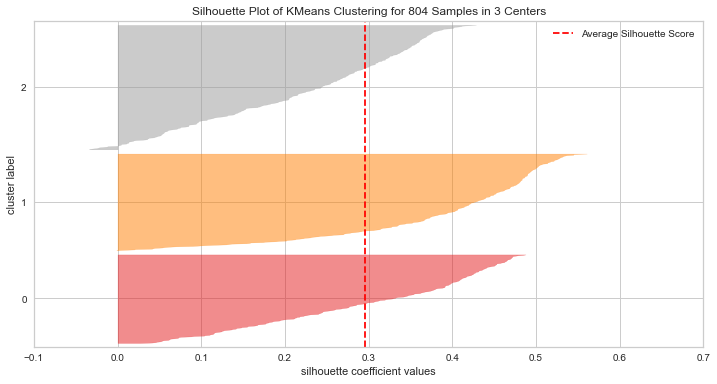

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 804 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(1, 1, figsize=(12,6))
visualizer = SilhouetteVisualizer(kmeans, ax=ax)
visualizer.fit(transformed_df) 
visualizer.show() 

### Cluster Graphs (Without Normalization & Feature Selection)

In [45]:
def plot_cluster_models(cluster_list,index_list):
    fig,ax = plt.subplots(1,3,figsize=(30, 8))
    for i in range(0,3):
        scatter = ax[i].scatter(df['compactness'],df['scaled_variance'],c=clusters_df[cluster_list[i]],s=50,cmap='viridis')
        ax[i].set_xlabel('Compactness',fontsize=18)
        ax[i].set_ylabel('Scaled Variance',fontsize=18)
        title = cluster_list[i] + " = " + str(silhouette_scores[index_list[i]]) 
        ax[i].set_title(title,fontsize=25)

We can see that, in Gaussian Mixture the dots are not completely discrete. Agglomerative Clusters are properly separated and seems the best. Also in first graph KMeans is not as bad clustered as Gaussian Mixture and very close to Agglomerative Clusters.

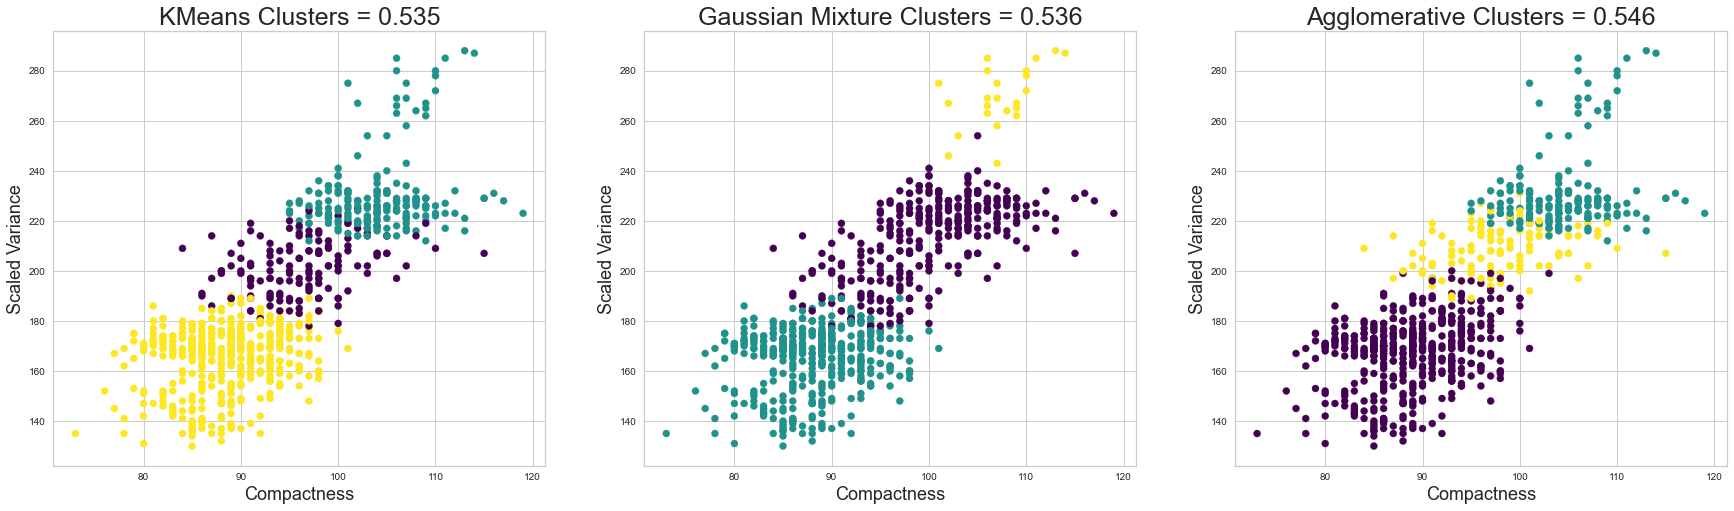

In [46]:
plot_cluster_models(["KMeans Clusters","Gaussian Mixture Clusters","Agglomerative Clusters"],[0,1,2])

### Cluster Graphs (With Normalization & Feature Selection)

We can see that all clusters are seperated quite irregular.

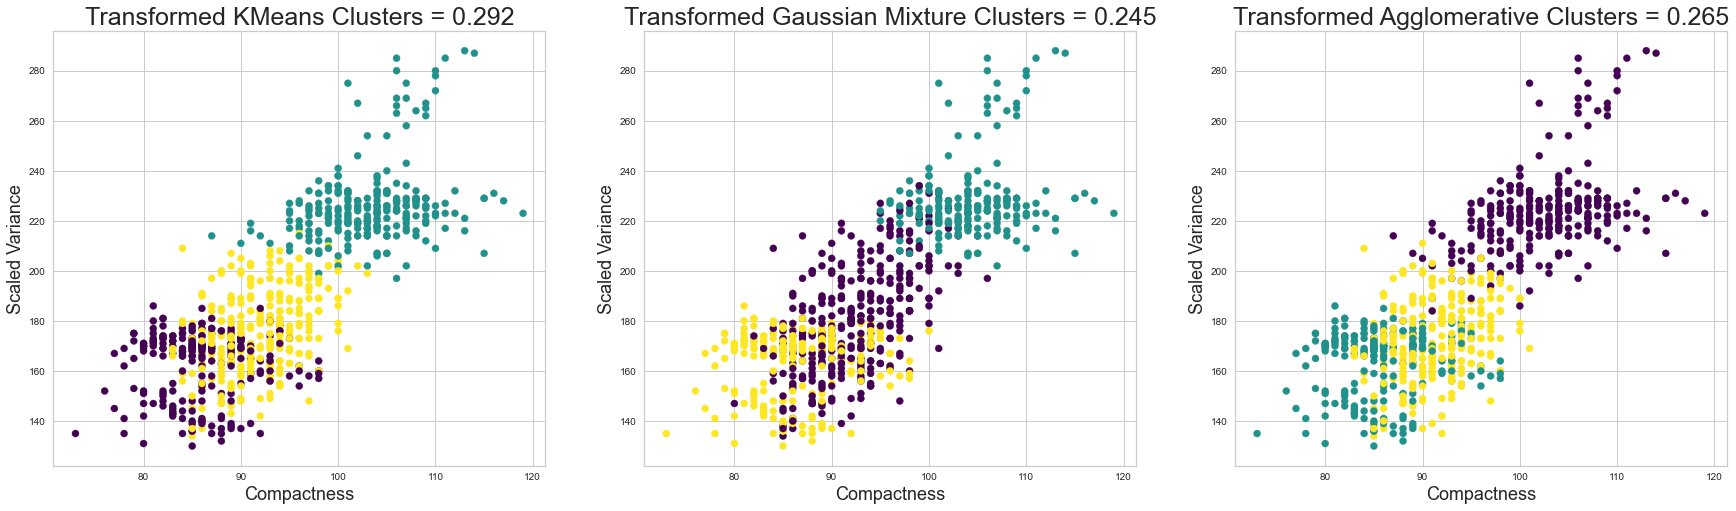

In [47]:
plot_cluster_models(["Transformed KMeans Clusters","Transformed Gaussian Mixture Clusters","Transformed Agglomerative Clusters"],[3,4,5])

### Comparison of Untransformed - Transformed Data Clustering

In all duo-graphs below you can see that clustering models performed better with untransformed data. I showed comparisons with all model couples and left graph is better clustered for each one. 

In [48]:
def plot_cluster_models(cluster_type1,cluster_type2,index1,index2):
    fig,ax = plt.subplots(1,2,figsize=(20, 6))
    scatter = ax[0].scatter(df['compactness'],df['scaled_variance'],c=clusters_df[cluster_type1],s=50,cmap='viridis')
    ax[0].set_xlabel('Compactness',fontsize=18)
    ax[0].set_ylabel('Scaled Variance',fontsize=18)
    title1 = cluster_type1 + " = " + str(silhouette_scores[index1]) 
    ax[0].set_title(title1,fontsize=25)
    scatter2 = ax[1].scatter(df['compactness'],df['scaled_variance'],c=clusters_df[cluster_type2],s=50,cmap='viridis')
    ax[1].set_xlabel('Compactness',fontsize=18)
    ax[1].set_ylabel('Scaled Variance',fontsize=18)
    title2 = cluster_type2 + " = " + str(silhouette_scores[index2]) 
    ax[1].set_title(title2,fontsize=25)

#### KMeans

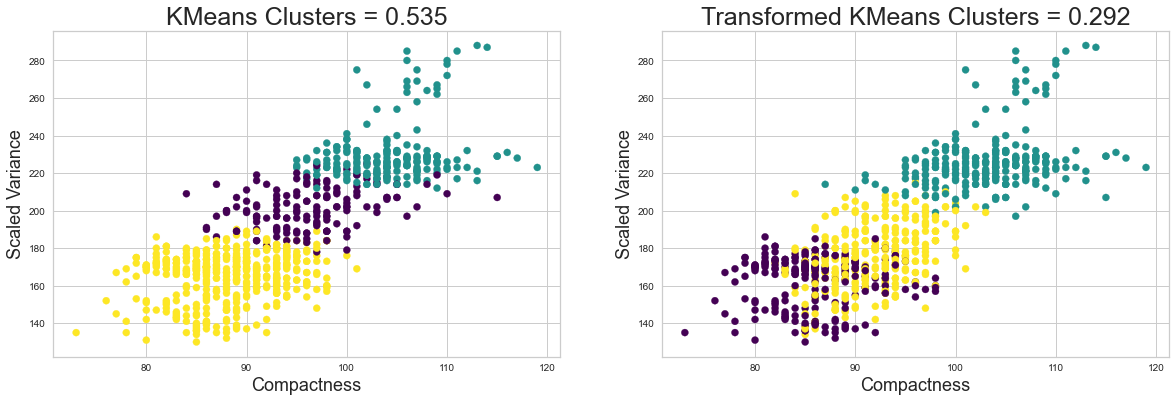

In [49]:
plot_cluster_models("KMeans Clusters","Transformed KMeans Clusters",0,3)

#### Gaussian Mixture

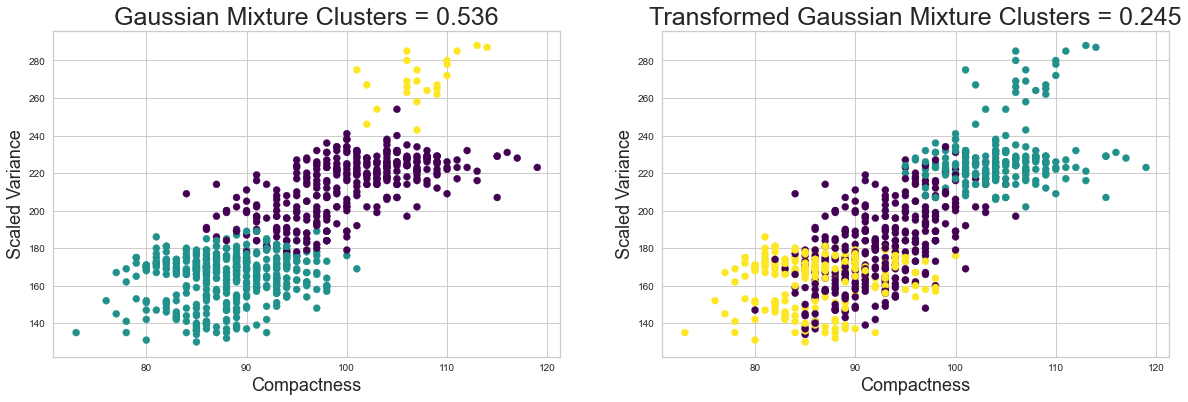

In [50]:
plot_cluster_models("Gaussian Mixture Clusters","Transformed Gaussian Mixture Clusters",1,4)

#### Agglomerative

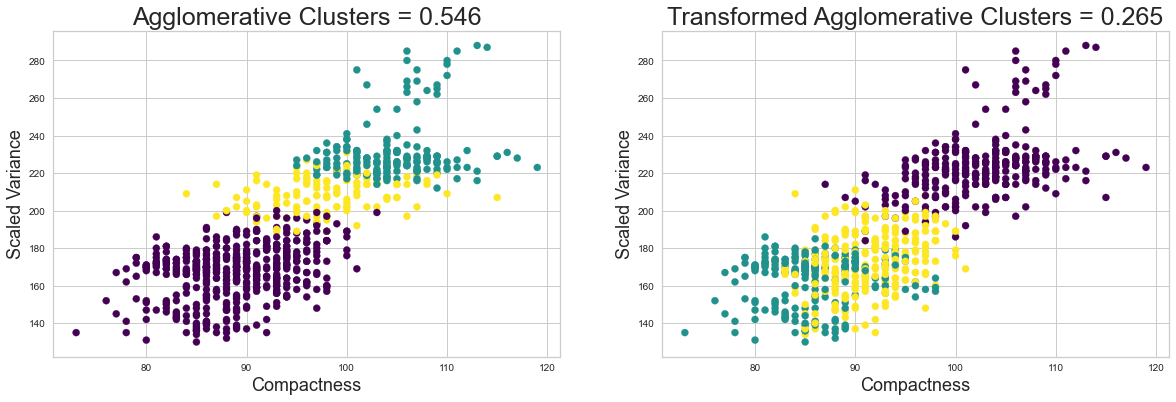

In [51]:
plot_cluster_models("Agglomerative Clusters","Transformed Agglomerative Clusters",2,5)

## Conclusion

In this assignment, the aim was focus on clustering methods. There are many clustering methods, and the most popular one is clearly KMeans. For this reason my first choice became KMeans Clustering. After that I choosed Gaussian Mixture Clustering and Agglomerative Clustering because I found them easy to implement. I started the work with general data preprocessing operations. After this operations data became ready to fit in clustering models. I had to find effect of normalization and feature selection to clustering, so I run all models with and without this operations.

When we look at the results, we can see that clustering models performed with nearly two times better with untransformed data than transformed data. We can't say normalization and feature selection is bad methods for clustering because it doesn't always work this way. We can only say that our untransformed data was more suitable for clustering models. When we compare silhouette scores, we can say that best clustering model was Agglomerative Clustering for our data. It is not perfect, but performed better than other models.

## References

1) https://scikit-learn.org/stable/modules/clustering.html <br>
2) https://www.javatpoint.com/clustering-in-machine-learning <br>
3) https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/ <br>
4) https://github.com/krasserm/machine-learning-notebooks <br>
5) https://machinelearningmastery.com/clustering-algorithms-with-python/ <br>
6) https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c <br>
7) https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering <br>
8) https://enjoymachinelearning.com/blog/k-means-accuracy-python-silhouette/#How_Do_You_Measure_Accuracy_in_K_Means_in_Python <br>
9) https://stackoverflow.com <br>